In [2]:
#Import Dependencies

import pandas as pd
from sodapy import Socrata
from config import myapptoken
from config import username
from config import password
import matplotlib.pyplot as plt
import numpy as np

# Example authenticated client (needed for non-public datasets):
client = Socrata("www.dallasopendata.com",
                 myapptoken,
                 username= username,
                 password= password)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("f77p-sgrc", limit=30000) #Fiscal Year 2021-2022
results1 = client.get("7h2m-3um5", limit=40000) #Fiscal Year 2019-2020
results2 = client.get("wb7n-sdxi", limit=40000) #Fiscal Year 2017-2018
results3 = client.get("kf5k-aswg", limit=50000) #Fiscal Year 2018-2019
results4 = client.get("sq59-vp2t", limit=25000) #Fiscal Year 2020-2021

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df1 = pd.DataFrame.from_records(results1)
results_df2 = pd.DataFrame.from_records(results2)
results_df3 = pd.DataFrame.from_records(results3)
results_df4 = pd.DataFrame.from_records(results4)

In [4]:
#Merge Data
adoption_df = pd.merge(results_df, pd.merge(results_df1, pd.merge(results_df2, pd.merge(results_df3, results_df4, how="outer"), how="outer"), how = "outer"), how = "outer")

In [5]:
#Delete unnecessary columns
adoption_df = adoption_df.drop(columns=['kennel_number', 'activity_number', 'activity_sequence', 'source_id', 'census_tract', 'council_district', 'intake_total', 'reason', 'staff_id', 'due_out', 'hold_request', 'outcome_subtype', 'outcome_time', 'receipt_number', 'impound_number', 'service_request_number', 'chip_status', 'animal_origin', 'intake_time', 'additional_information'])

In [6]:
#Dropped duplicates
adoption_df = adoption_df.sort_values('month').drop_duplicates(['animal_id'], keep='last')

In [7]:
#Converting Months into numbers
def month_converter(data):
    data_split = data.split('.')
    #Define the translation table
    mapping = pd.DataFrame({'JAN':['01'], 'FEB':['02'], 'MAR':['03'], 'APR':['04'], 'MAY':['05'], 'JUN':['06'], 'JUL':['07'], 'AUG':['08'], 'SEP':['09'], 'OCT':['10'], 'NOV':['11'], 'DEC':['12']})
    #get the number of the month
    month_num = mapping[data_split[0]][0]
    #Join the the month and year to get the result
    result = '-'.join([data_split[1], month_num])
    return(result)

In [8]:
#Dog data only
dog_df = adoption_df.loc[(adoption_df["animal_type"]== "DOG")]

In [9]:
#Dog adoption
dog_adopt_df = dog_df.loc[dog_df["outcome_type"]=="ADOPTION"]
dog_adopt_df.to_csv("../clean_datasets/DogAdopt.csv")

In [10]:
#Cat data only
cat_df = adoption_df.loc[(adoption_df["animal_type"] == "CAT")]

In [11]:
#Cat adoption
cat_adopt_df = cat_df.loc[cat_df["outcome_type"]=="ADOPTION"]
cat_adopt_df.to_csv("../clean_datasets/CatAdopt.csv")

In [12]:
#Dog adoption in 2018
dogadopt18_df = dog_adopt_df.loc[dog_adopt_df['year']=='FY2018']
dogadopt18_df.month=dogadopt18_df.month.apply(month_converter)
dogmonth18 = dogadopt18_df.groupby(['month']).outcome_type.count()
#Dog adoption in 2019
dogadopt19_df = dog_adopt_df.loc[dog_adopt_df['year']=='FY2019']
dogadopt19_df.month=dogadopt19_df.month.apply(month_converter)
dogmonth19 = dogadopt19_df.groupby(['month']).outcome_type.count()
#Dog adoption in 2022
dogadopt22_df = dog_adopt_df.loc[dog_adopt_df['year']=='FY2022']
dogadopt22_df.month=dogadopt22_df.month.apply(month_converter)
dogmonth22 = dogadopt22_df.groupby(['month']).outcome_type.count()

C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\4118449285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogadopt18_df.month=dogadopt18_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\4118449285.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogadopt19_df.month=dogadopt19_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\4118449285.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [13]:
#Cat adoption in 2018
catadopt18_df = cat_adopt_df.loc[cat_adopt_df['year']=='FY2018']
catadopt18_df.month=catadopt18_df.month.apply(month_converter)
catmonth18 = catadopt18_df.groupby(['month']).outcome_type.count()
#Cat adoption in 2019
catadopt19_df = cat_adopt_df.loc[cat_adopt_df['year']=='FY2019']
catadopt19_df.month=catadopt19_df.month.apply(month_converter)
catmonth19 = catadopt19_df.groupby(['month']).outcome_type.count()
#Cat adoption in 2022
catadopt22_df = cat_adopt_df.loc[cat_adopt_df['year']=='FY2022']
catadopt22_df.month=catadopt22_df.month.apply(month_converter)
catmonth22 = catadopt22_df.groupby(['month']).outcome_type.count()

C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\1844697938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catadopt18_df.month=catadopt18_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\1844697938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catadopt19_df.month=catadopt19_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\1844697938.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


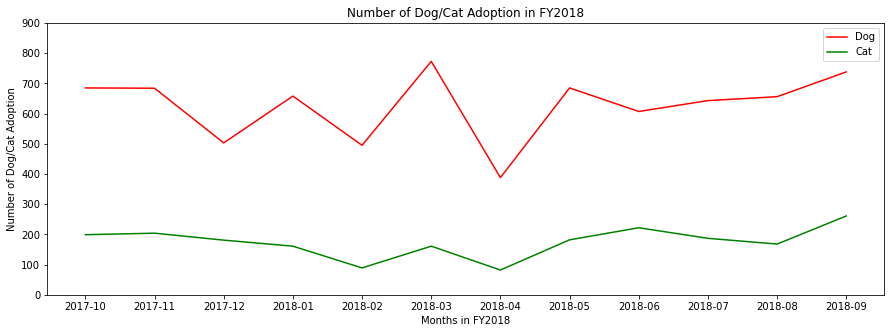

In [14]:
#X and Y value for Dogmonth18
x1 = dogmonth18.index
y1 = dogmonth18.values

#X and Y value for Catmonth18
x2 = catmonth18.index
y2 = catmonth18.values

plt.figure(figsize=(15,5))
plt.plot(x1, y1, color='r', label='Dog')
plt.plot(x2, y2, color='g', label='Cat')
plt.xlabel('Months in FY2018')
plt.ylabel('Number of Dog/Cat Adoption')
plt.title('Number of Dog/Cat Adoption in FY2018')
plt.yticks(np.arange(0,1000,100))
plt.legend()
plt.savefig('../Dallas_API/Plots/Adopt2018.png', dpi=300, bbox_inches='tight')

plt.show()

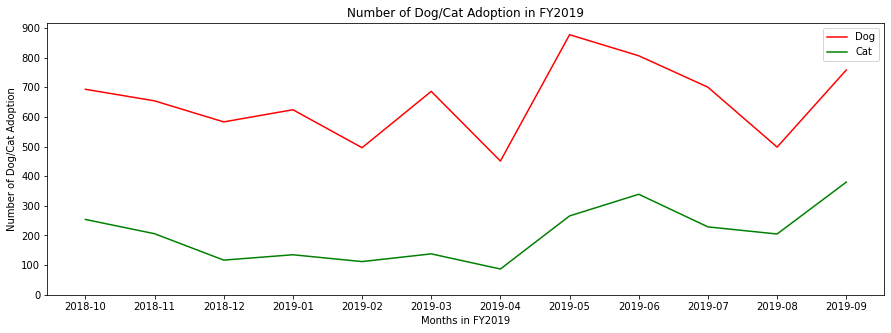

In [15]:
#X and Y value for Dogmonth19
x1 = dogmonth19.index
y1 = dogmonth19.values

#X and Y value for Catmonth19
x2 = catmonth19.index
y2 = catmonth19.values

plt.figure(figsize=(15,5))
plt.xlabel('Months in FY2019')
plt.ylabel('Number of Dog/Cat Adoption')
plt.title('Number of Dog/Cat Adoption in FY2019')
plt.plot(x1, y1, color='r', label='Dog')
plt.plot(x2, y2, color='g', label='Cat')
plt.yticks(np.arange(0,1000,100))
plt.legend()
plt.savefig('../Dallas_API/Plots/Adopt2019.png', dpi=300, bbox_inches='tight')

plt.show()

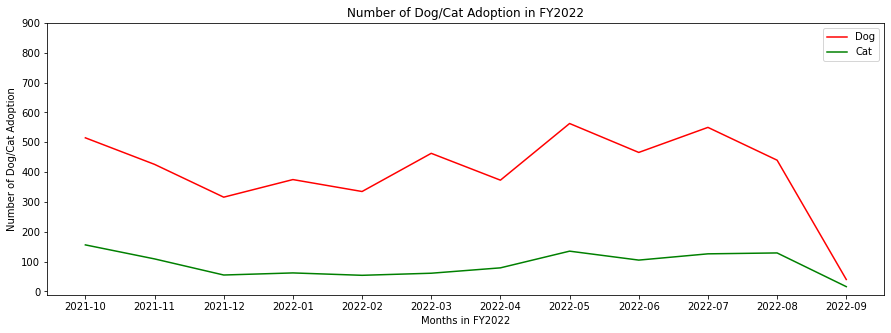

In [16]:
#X and Y value for Dogmonth22
x1 = dogmonth22.index
y1 = dogmonth22.values

#X and Y value for Catmonth22
x2 = catmonth22.index
y2 = catmonth22.values

plt.figure(figsize=(15,5))
plt.xlabel('Months in FY2022')
plt.ylabel('Number of Dog/Cat Adoption')
plt.title('Number of Dog/Cat Adoption in FY2022')
plt.plot(x1, y1, color='r', label='Dog')
plt.plot(x2, y2, color='g', label='Cat')
plt.yticks(np.arange(0,1000,100))
plt.legend()
plt.savefig('../Dallas_API/Plots/Adopt2022.png', dpi=300, bbox_inches='tight')

plt.show()

In [17]:
dog_surrender_df = dog_df.loc[dog_df["intake_type"]=="OWNER SURRENDER"]
dog_surrender_df.to_csv("../clean_datasets/DogSurrender.csv")

In [18]:
#Dog surrendered in 2018
dogsur18_df = dog_surrender_df.loc[dog_surrender_df['year']=='FY2018']
dogsur18_df.month=dogsur18_df.month.apply(month_converter)
dog_sur18 = dogsur18_df.groupby(['month']).outcome_type.count()
#Dog surrendered in 2019
dogsur19_df = dog_surrender_df.loc[dog_surrender_df['year']=='FY2019']
dogsur19_df.month=dogsur19_df.month.apply(month_converter)
dog_sur19 = dogsur19_df.groupby(['month']).outcome_type.count()
#Dog surrendered in 2022
dogsur22_df = dog_surrender_df.loc[dog_surrender_df['year']=='FY2022']
dogsur22_df.month=dogsur22_df.month.apply(month_converter)
dog_sur22 = dogsur22_df.groupby(['month']).outcome_type.count()

C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\3102108199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogsur18_df.month=dogsur18_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\3102108199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogsur19_df.month=dogsur19_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\3102108199.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [19]:
cat_surrender_df = cat_df.loc[cat_df["intake_type"]=="OWNER SURRENDER"]
cat_surrender_df.to_csv("../clean_datasets/CatSurrender.csv")

In [20]:
#Cat surrendered in 2018
catsur18_df = cat_surrender_df.loc[cat_surrender_df['year']=='FY2018']
catsur18_df.month=catsur18_df.month.apply(month_converter)
cat_sur18= catsur18_df.groupby(['month']).outcome_type.count()
#Cat surrendered in 2019
catsur19_df = cat_surrender_df.loc[cat_surrender_df['year']=='FY2019']
catsur19_df.month=catsur19_df.month.apply(month_converter)
cat_sur19 = catsur19_df.groupby(['month']).outcome_type.count()
#Cat surrendered in 2022
catsur22_df = cat_surrender_df.loc[cat_surrender_df['year']=='FY2022']
catsur22_df.month=catsur22_df.month.apply(month_converter)
cat_sur22 = catsur22_df.groupby(['month']).outcome_type.count()

C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\3299041248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catsur18_df.month=catsur18_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\3299041248.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catsur19_df.month=catsur19_df.month.apply(month_converter)
C:\Users\dillo\AppData\Local\Temp\ipykernel_15160\3299041248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

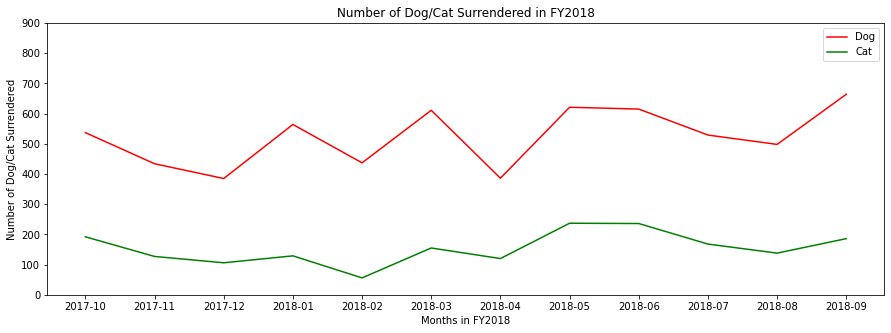

In [21]:
#X and Y value for Dog surrendered in 2018
x1 = dog_sur18.index
y1 = dog_sur18.values

#X and Y value for Cat surrendered in 2018
x2 = cat_sur18.index
y2 = cat_sur18.values

plt.figure(figsize=(15,5))
plt.xlabel('Months in FY2018')
plt.ylabel('Number of Dog/Cat Surrendered')
plt.title('Number of Dog/Cat Surrendered in FY2018')
plt.plot(x1, y1, color='r', label='Dog')
plt.plot(x2, y2, color='g', label='Cat')
plt.yticks(np.arange(0,1000,100))
plt.legend()
plt.savefig('../Dallas_API/Plots/Abandon2018.png', dpi=300, bbox_inches='tight')

plt.show()

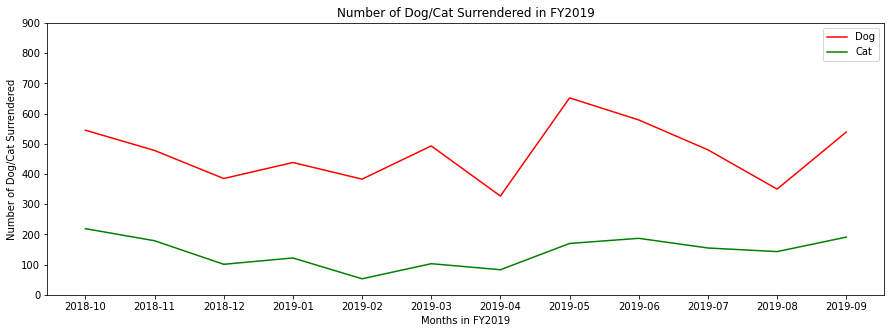

In [22]:
#X and Y value for Dog surrendered in 2019
x1 = dog_sur19.index
y1 = dog_sur19.values

#X and Y value for Cat surrendered in 2019
x2 = cat_sur19.index
y2 = cat_sur19.values

plt.figure(figsize=(15,5))
plt.xlabel('Months in FY2019')
plt.ylabel('Number of Dog/Cat Surrendered')
plt.title('Number of Dog/Cat Surrendered in FY2019')
plt.plot(x1, y1, color='r', label='Dog')
plt.plot(x2, y2, color='g', label='Cat')
plt.yticks(np.arange(0,1000,100))
plt.legend()
plt.savefig('../Dallas_API/Plots/Abandon2019.png', dpi=300, bbox_inches='tight')

plt.show()

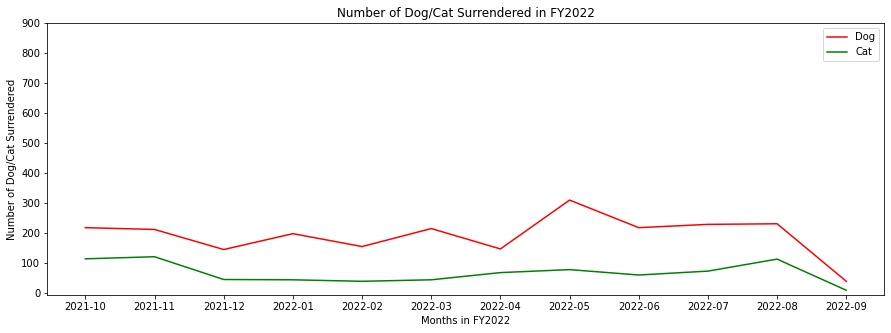

In [23]:
#X and Y value for Dog surrendered in 2022
x1 = dog_sur22.index
y1 = dog_sur22.values

#X and Y value for Cat surrendered in 2022
x2 = cat_sur22.index
y2 = cat_sur22.values

plt.figure(figsize=(15,5))
plt.xlabel('Months in FY2022')
plt.ylabel('Number of Dog/Cat Surrendered')
plt.title('Number of Dog/Cat Surrendered in FY2022')
plt.plot(x1, y1, color='r', label='Dog')
plt.plot(x2, y2, color='g', label='Cat')
plt.yticks(np.arange(0,1000,100))
plt.legend()
plt.savefig('../Dallas_API/Plots/Abandon2022.png', dpi=300, bbox_inches='tight')

plt.show()